In [77]:
import pandas as pd

df = pd.read_excel("../data/dados_frutas.xlsx")

O dataset "dados_frutas" tem as informações de algumas frutas, se ela é arredondada, suculenta, vermelha, doce, e qual a fruta está sendo descrita

In [86]:
df

,Arredondada,Suculenta,Vermelha,Doce,Fruta
0,0,1,1,1,Morango
1,1,0,0,0,Limão
2,1,1,0,1,Pera
3,0,0,0,1,Banana
4,1,1,1,1,Cereja
5,1,1,1,0,Tomate
6,1,1,1,1,Maçã


esse seria um filtro manual buscando uma fruta que seja arredondada,suculenta, vermelha e doce
a fruta pode então ser maçã ou cereja

In [78]:
filtro_redonda = df["Arredondada"] == 1
filtro_suculenta = df["Suculenta"] == 1
filtro_vermelha = df["Vermelha"] == 1
filtro_doce = df["Doce"] == 1

df[filtro_redonda & filtro_suculenta & filtro_vermelha & filtro_doce]

,Arredondada,Suculenta,Vermelha,Doce,Fruta
4,1,1,1,1,Cereja
6,1,1,1,1,Maçã


utilizando o sklearn ensinamos a máquina a verificar qual é a fruta, a partir das informações que temos

In [79]:
from sklearn import tree

In [ ]:
features = ["Arredondada","Suculenta","Vermelha","Doce"] #variaveis utilizadas para prever a fruta
target = "Fruta"

X = df[features]
y = df[target]

arvore = tree.DecisionTreeClassifier()
arvore.fit(X,y)

DecisionTreeClassifier()

[]

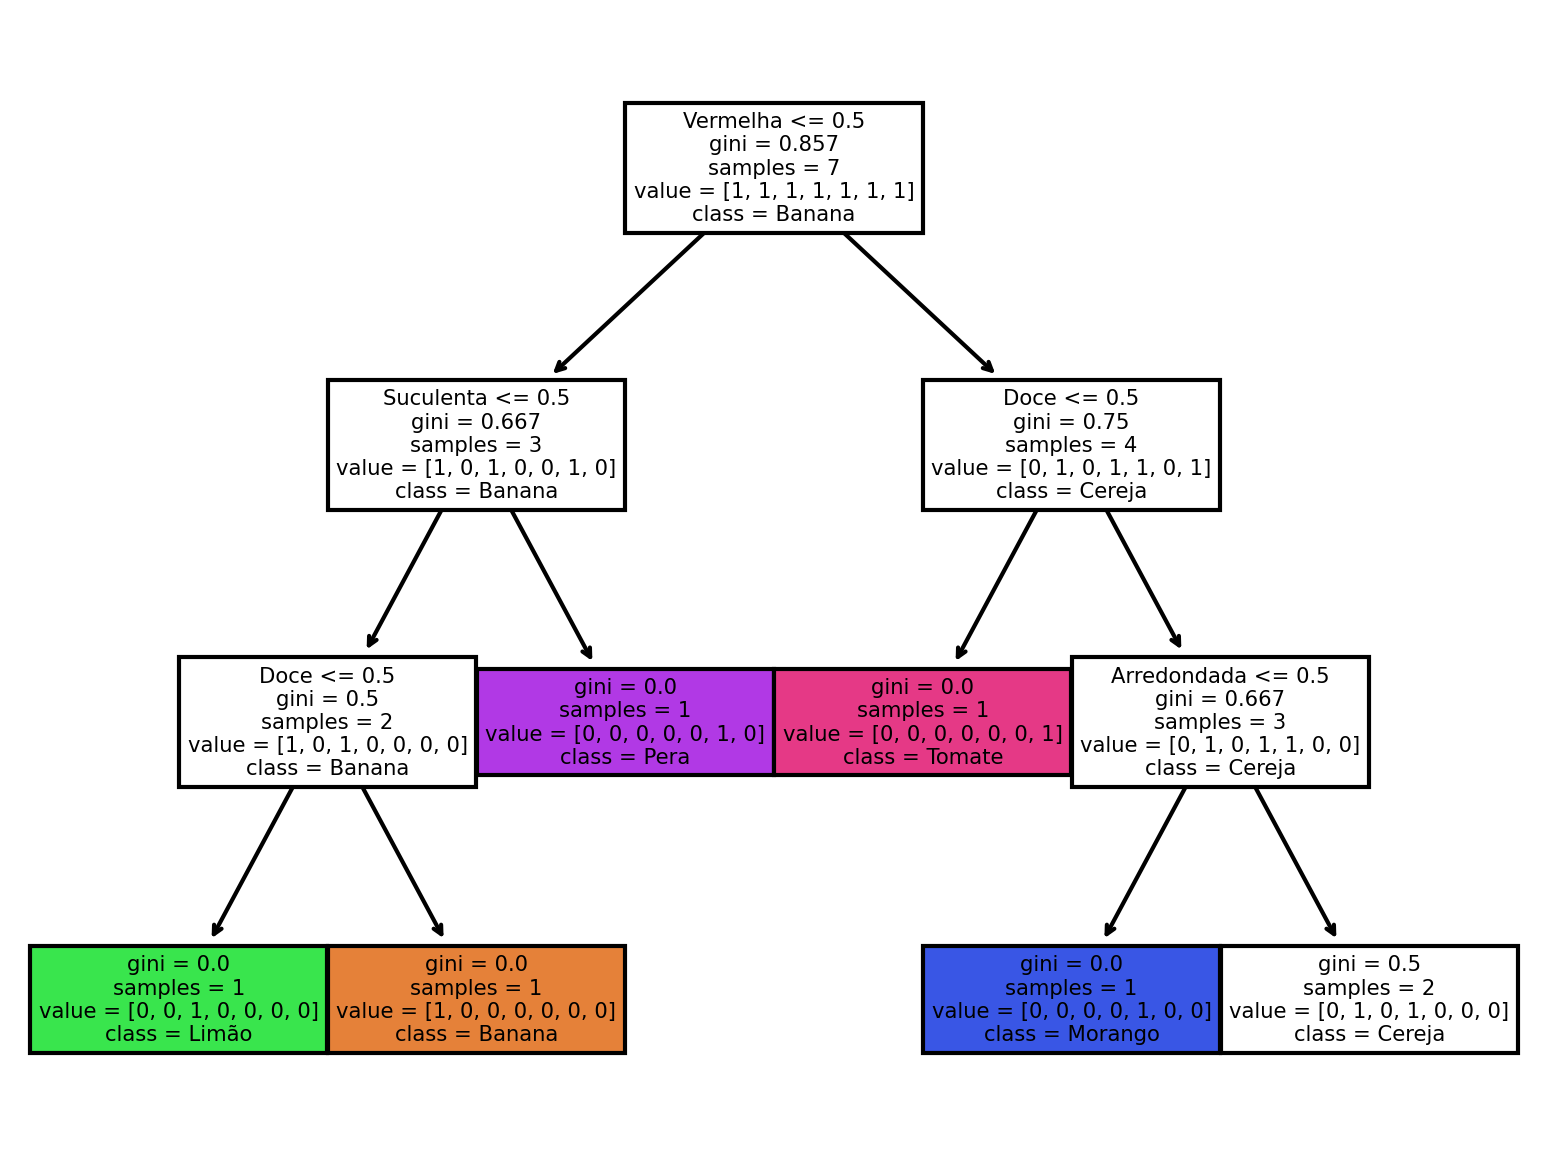

In [89]:
import matplotlib.pyplot as plt

plt.figure(dpi=300)

tree.plot_tree(arvore,
               class_names=arvore.classes_,
               feature_names=features,
               filled=True)
plt.plot()

## Como funciona esse gráfico?
O modelo de árvore de decisão retorna o gráfico acima, cada caixa é um **nó**
Observando o primeiro nó linha a linha:
- Vermelha <= 0,5 : se for vermelha (1) a arvore se divide para a direita, se não for (0) a arvore vai para a esquerda
- Gini = 0.857: é o indice de pureza do nó, mostra quantos itens de cada classe possui nesse nó (0= puro)
- samples = 7: número de amostras
- value = [1, 1, 1, 1, 1, 1, 1]: mostra quantos valores de cada classe possui nesse nó (como é o nó inicial, todos estão nele)
- class = Banana: a classe majoritária nesse nó (nesse caso está trazendo apenas o primeiro nome da lista de classes)

Os nós pintados são os **nós puros** que possuem apenas uma única classe!
Então a máquina entendeu que uma fruta que possui as informações de:
- Vermelha = Não
- Suculenta = Não
- Doce = Não
é um limão!

Para fazer uma nova predição:

In [120]:
#["arredondada","suculenta","vermelha","doce"]
arvore.predict([[0,1,1,1]])
#não é arredondada,é suculenta, é vermelha e é doce
#esse código somente retorna qual é a classe mais provavel, porém não sabemos qual é a probabilidade de ser ela

/home/andre/.cache/pypoetry/virtualenvs/introducao-machine-learning-3awspm4o-py3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Morango'], dtype=object)

In [ ]:
probas = arvore.predict_proba([[1,1,1,1]])[0]

pd.Series(probas,index=arvore.classes_)


/home/andre/.cache/pypoetry/virtualenvs/introducao-machine-learning-3awspm4o-py3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Banana     0.0
Cereja     0.5
Limão      0.0
Maçã       0.5
Morango    0.0
Pera       0.0
Tomate     0.0
dtype: float64